In [76]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv(r"C:\Users\nanaa\Downloads\BathSoapHousehold3.csv")

data.describe()






,Member id,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
count,6.000000e+02,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,...,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,1.104188e+06,2.500000,2.048333,8.178333,1.738333,3.213333,4.043333,4.191667,3.233333,0.931667,...,0.092324,0.096909,0.080148,0.030806,0.020248,0.029367,0.006217,0.024938,0.136481,0.025398
std,4.560152e+04,1.118967,1.134964,4.294641,0.648510,0.865489,2.190004,2.300090,1.217110,0.507372,...,0.166330,0.195760,0.152564,0.062816,0.076657,0.098467,0.026312,0.095448,0.266045,0.087592
min,1.010010e+06,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.065295e+06,1.750000,1.000000,4.000000,2.000000,3.000000,3.000000,3.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.106235e+06,2.500000,3.000000,10.000000,2.000000,3.000000,4.500000,4.000000,4.000000,1.000000,...,0.020155,0.012601,0.007750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.148292e+06,3.250000,3.000000,10.000000,2.000000,4.000000,5.000000,5.000000,4.000000,1.000000,...,0.103679,0.082935,0.086341,0.031645,0.000000,0.007739,0.000000,0.005522,0.118416,0.000000
max,1.167670e+06,4.000000,3.000000,19.000000,2.000000,4.000000,9.000000,15.000000,5.000000,2.000000,...,0.971098,1.000000,0.963636,0.407643,1.000000,0.897507,0.333333,1.000000,1.000000,0.840194


In [14]:
print(data.shape)


(600, 46)


In [77]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv(r"C:\Users\nanaa\Downloads\BathSoapHousehold3.csv")

# Define relevant variables for each scenario
purchase_behavior_vars = ['No. of Brands', 'Brand Runs', 'Total Volume', 'No. of  Trans', 'Value', 
                          'Trans / Brand Runs', 'Vol/Tran', 'Avg. Price ']
basis_of_purchase_vars = ['Pur Vol No Promo - %', 'Pur Vol Promo 6 %', 'Pur Vol Other Promo %']
demographics_vars = ['SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'CHILD', 'CS', 'Affluence Index']
combined_vars = purchase_behavior_vars + basis_of_purchase_vars + demographics_vars

# Combine all variables
all_vars = combined_vars

# Standardize the variables
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[all_vars])

# Choose the number of clusters (k)
k = 2

# Perform k-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add clusters as a new column in the dataset
data['Cluster'] = clusters

# Group the dataset by clusters
grouped_data = data.groupby('Cluster')

# Create a list to store DataFrames for each group
grouped_dfs = []

# Iterate over the groups and create DataFrames, rounding decimals
for name, group in grouped_data:
    group_df = group.round(decimals=2)
    grouped_dfs.append(group_df)

# Display DataFrames for each group in a tabular form
for idx, df in enumerate(grouped_dfs):
    print(f"Cluster {idx}:")
    display(df)
    print('\n')


C:\Users\nanaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nanaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Cluster 0:


,Member id,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,...,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15,Cluster
3,1014030,4,0,0,0,4,0,0,5,0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.60,0.0,0
19,1025070,3,0,0,0,2,0,0,5,0,...,0.22,0.00,0.00,0.33,0.0,0.33,0.11,0.00,0.0,0
20,1025140,4,0,0,0,2,0,0,5,0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.94,0.0,0
23,1027160,3,0,0,0,3,0,0,5,0,...,0.00,0.00,0.06,0.00,0.0,0.00,0.00,0.75,0.0,0
24,1027210,4,0,0,0,3,0,0,5,0,...,0.08,0.32,0.07,0.00,0.0,0.00,0.00,0.53,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,1161390,1,0,0,0,4,0,0,5,0,...,0.00,0.00,0.00,0.00,0.0,0.00,1.00,0.00,0.0,0
554,1161750,2,0,0,0,4,0,0,5,0,...,0.00,0.02,0.00,0.00,0.0,0.00,0.00,0.28,0.0,0
555,1161780,1,0,0,0,4,0,0,5,0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.27,0.0,0
570,1163300,1,0,0,0,4,0,0,5,0,...,0.00,0.00,0.00,0.16,0.0,0.00,0.00,0.00,0.0,0




Cluster 1:


,Member id,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,...,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15,Cluster
0,1010010,4,3,10,1,4,4,2,4,1,...,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.13,0.34,1
1,1010020,3,2,10,2,2,4,4,2,1,...,0.03,0.02,0.01,0.00,0.06,0.00,0.00,0.08,0.00,1
2,1014020,2,3,10,2,4,5,6,4,1,...,0.03,0.01,0.01,0.00,0.00,0.02,0.00,0.56,0.00,1
4,1014190,4,1,10,2,3,4,4,3,1,...,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.14,0.00,1
5,1017020,4,3,10,2,3,4,5,2,1,...,0.00,0.01,0.07,0.00,0.00,0.00,0.00,0.07,0.27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1167090,2,3,10,2,4,5,5,4,1,...,0.00,0.00,0.00,0.02,0.90,0.00,0.00,0.00,0.00,1
596,1167230,3,3,10,2,3,5,4,4,1,...,0.07,0.15,0.00,0.04,0.00,0.00,0.09,0.00,0.05,1
597,1167340,3,3,17,2,4,4,9,4,1,...,0.00,0.03,0.00,0.04,0.00,0.00,0.00,0.18,0.00,1
598,1167350,2,1,4,2,4,5,2,4,2,...,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.14,0.00,1


Partitioning the dataset

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv(r"C:\Users\nanaa\Downloads\BathSoapHousehold3.csv")

# Define relevant variables for each scenario
purchase_behavior_vars = ['No. of Brands', 'Brand Runs', 'Total Volume', 'No. of  Trans', 'Value', 
                          'Trans / Brand Runs', 'Vol/Tran', 'Avg. Price ']
basis_of_purchase_vars = ['Pur Vol No Promo - %', 'Pur Vol Promo 6 %', 'Pur Vol Other Promo %']
demographics_vars = ['SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'CHILD', 'CS', 'Affluence Index']
combined_vars = purchase_behavior_vars + basis_of_purchase_vars + demographics_vars

# Combine all variables
all_vars = combined_vars

# Split features (X)
X = data[all_vars]

# Standardize the variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (k)
k = 2

# Partition the dataset into training and testing sets
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Perform k-means clustering on the training data
kmeans = KMeans(n_clusters=k, random_state=42)
clusters_train = kmeans.fit_predict(X_train)

# Use the trained model to predict clusters for testing data
clusters_test = kmeans.predict(X_test)

# Add predicted clusters as a new column in the dataset
data['Cluster'] = kmeans.predict(X_scaled)

# Show the first few rows of the updated dataset
print(data.head())


C:\Users\nanaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nanaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


   Member id  SEC  FEH  MT  SEX  AGE  EDU  HS  CHILD  CS  ...  PropCat 7  \
0    1010010    4    3  10    1    4    4   2      4   1  ...   0.000000   
1    1010020    3    2  10    2    2    4   4      2   1  ...   0.026834   
2    1014020    2    3  10    2    4    5   6      4   1  ...   0.033550   
3    1014030    4    0   0    0    4    0   0      5   0  ...   0.000000   
4    1014190    4    1  10    2    3    4   4      3   1  ...   0.000000   

   PropCat 8  PropCat 9  PropCat 10  PropCat 11  PropCat 12  PropCat 13  \
0   0.000000   0.000000         0.0    0.000000    0.028037         0.0   
1   0.016100   0.014311         0.0    0.059034    0.000000         0.0   
2   0.010823   0.008658         0.0    0.000000    0.016234         0.0   
3   0.000000   0.000000         0.0    0.000000    0.000000         0.0   
4   0.048193   0.000000         0.0    0.000000    0.000000         0.0   

   PropCat 14  PropCat 15  Cluster  
0    0.130841    0.339564        0  
1    0.080501    0

In [79]:
# Analyze cluster characteristics
cluster_stats = data.groupby('Cluster')[purchase_behavior_vars].mean()
print(cluster_stats)

# Compare clusters with value
# For example, if 'Value' column indicates high-value customers (> median), compare the clusters' characteristics with high-value customers to identify the value segments.

# Visualize clusters
# You can create scatter plots or other visualizations to understand the distribution of clusters in feature space.

# Interpretation
# Based on the analysis and visualization, interpret which clusters exhibit behaviors indicative of value and non-value customers.

# Label segments
# Once identified, you can label the clusters as value and non-value segments in your dataset.


         No. of Brands  Brand Runs  Total Volume  No. of  Trans        Value  \
Cluster                                                                        
0             3.789474   16.915414  12964.007519      33.843985  1452.135545   
1             2.441176    6.647059   3706.029412      10.102941   439.643382   

         Trans / Brand Runs    Vol/Tran  Avg. Price   
Cluster                                               
0                  2.733421  418.756165    11.746353  
1                  1.713088  386.065441    12.526029  


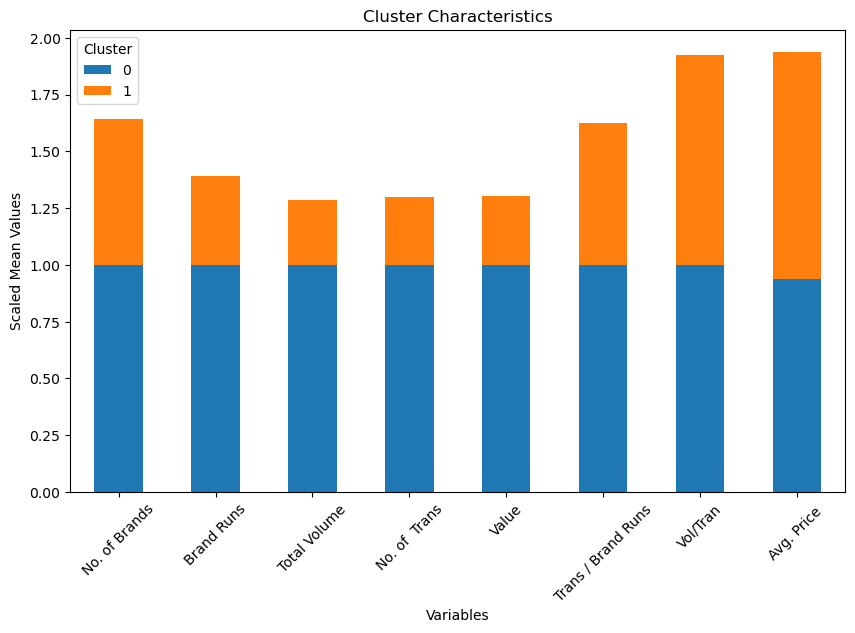

In [83]:
import matplotlib.pyplot as plt

# Analyze cluster characteristics
cluster_stats = data.groupby('Cluster')[purchase_behavior_vars].mean()

# Scale down the mean values
cluster_stats_scaled = cluster_stats / cluster_stats.max()

# Plot stacked bar chart
cluster_stats_scaled.T.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Cluster Characteristics')
plt.xlabel('Variables')
plt.ylabel('Scaled Mean Values')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.show()



In [85]:
# Assuming cluster_stats contains the mean values of purchase behavior variables for each cluster
# Visually inspect cluster_stats and determine which cluster represents value and non-value segments

# Example:
# Let's say you visually determined that Cluster 0 represents the value segment and Cluster 1 represents the non-value segment

# Assign labels based on visual inspection
value_cluster = 0
non_value_cluster = 1

# Create a new column 'Segment' to store the segment labels
data['Segment'] = 'Non-Value'  # Initialize with Non-Value segment
data.loc[data['Cluster'] == value_cluster, 'Segment'] = 'Value'  # Assign Value segment label to value_cluster

# Display the first few rows of the updated dataset with segment labels
print(data.head())


   Member id  SEC  FEH  MT  SEX  AGE  EDU  HS  CHILD  CS  ...  PropCat 8  \
0    1010010    4    3  10    1    4    4   2      4   1  ...   0.000000   
1    1010020    3    2  10    2    2    4   4      2   1  ...   0.016100   
2    1014020    2    3  10    2    4    5   6      4   1  ...   0.010823   
3    1014030    4    0   0    0    4    0   0      5   0  ...   0.000000   
4    1014190    4    1  10    2    3    4   4      3   1  ...   0.048193   

   PropCat 9  PropCat 10  PropCat 11  PropCat 12  PropCat 13  PropCat 14  \
0   0.000000         0.0    0.000000    0.028037         0.0    0.130841   
1   0.014311         0.0    0.059034    0.000000         0.0    0.080501   
2   0.008658         0.0    0.000000    0.016234         0.0    0.561688   
3   0.000000         0.0    0.000000    0.000000         0.0    0.600000   
4   0.000000         0.0    0.000000    0.000000         0.0    0.144578   

   PropCat 15  Cluster    Segment  
0    0.339564        0      Value  
1    0.000000 

In [86]:
import pandas as pd

# True labels are stored in the 'Segment' column
true_labels = data['Segment']

# Predicted labels are stored in the 'Cluster' column
predicted_labels = data['Cluster']

# Create a DataFrame containing true and predicted labels
labels_df = pd.DataFrame({'True_Labels': true_labels, 'Predicted_Labels': predicted_labels})

# Display the DataFrame
print(labels_df.head())


  True_Labels  Predicted_Labels
0       Value                 0
1       Value                 0
2       Value                 0
3   Non-Value                 1
4       Value                 0


In [88]:
# Define a mapping for label conversion
label_mapping = {'Non-Value': 0, 'Value': 1}

# Convert true labels to integers
true_labels_int = true_labels.map(label_mapping)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels_int, predicted_labels)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[  0  68]
 [532   0]]


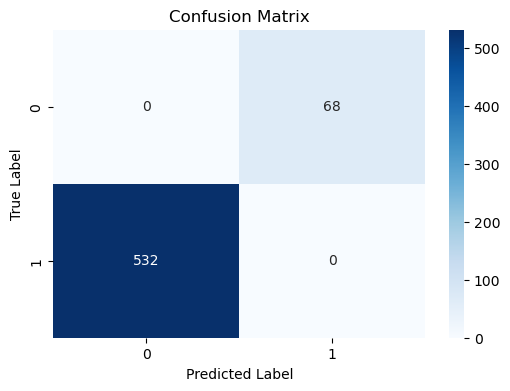

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define a mapping for label conversion
label_mapping = {'Non-Value': 0, 'Value': 1}

# Convert true labels to integers
true_labels_int = true_labels.map(label_mapping)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels_int, predicted_labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


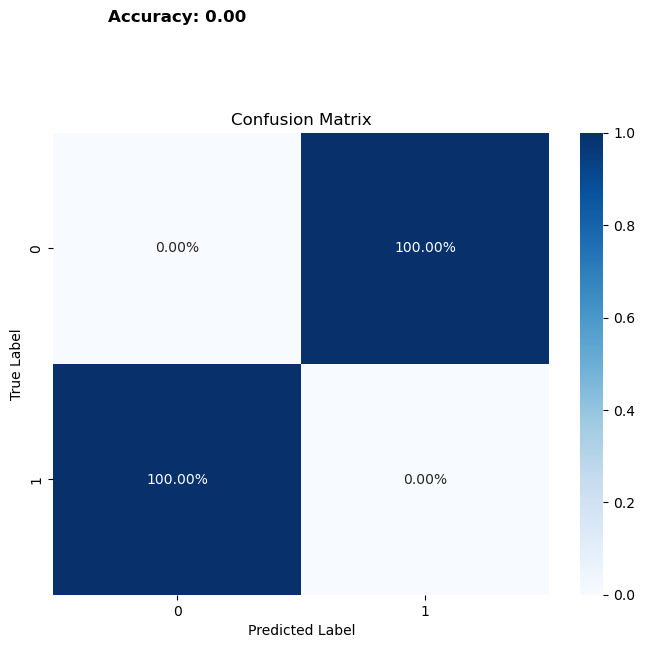

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# Calculate accuracy
accuracy = accuracy_score(true_labels_int, predicted_labels)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels_int, predicted_labels)

# Calculate percentages
conf_matrix_percentages = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentages, annot=True, fmt='.2%', cmap='Blues')

# Add accuracy to the plot
plt.text(0.5, -0.5, f'Accuracy: {accuracy:.2f}', ha='center', va='center', fontsize=12, fontweight='bold')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [84]:
y_true = data['Value']


just rounded to 2 decimals

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv(r"C:\Users\nanaa\Downloads\BathSoapHousehold3.csv")

# Define relevant variables for each scenario
purchase_behavior_vars = ['No. of Brands', 'Brand Runs', 'Total Volume', 'No. of  Trans', 'Value', 
                          'Trans / Brand Runs', 'Vol/Tran', 'Avg. Price ']
basis_of_purchase_vars = ['Pur Vol No Promo - %', 'Pur Vol Promo 6 %', 'Pur Vol Other Promo %']
demographics_vars = ['SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'CHILD', 'CS', 'Affluence Index']
combined_vars = purchase_behavior_vars + basis_of_purchase_vars + demographics_vars

# Combine all variables
all_vars = combined_vars

# Split features (X)
X = data[all_vars]

# Standardize the variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (k)
k = 2

# Partition the dataset into training and testing sets
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Perform k-means clustering on the training data
kmeans = KMeans(n_clusters=k, random_state=42)
clusters_train = kmeans.fit_predict(X_train)

# Use the trained model to predict clusters for testing data
clusters_test = kmeans.predict(X_test)

# Add predicted clusters as a new column in the dataset
data['Cluster'] = kmeans.predict(X_scaled)

# Round the values in the DataFrame to two decimal places
data_rounded = data.round(2)

# Show the first few rows of the updated dataset
print(data_rounded.head())


C:\Users\nanaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nanaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


   Member id  SEC  FEH  MT  SEX  AGE  EDU  HS  CHILD  CS  ...  PropCat 7  \
0    1010010    4    3  10    1    4    4   2      4   1  ...       0.00   
1    1010020    3    2  10    2    2    4   4      2   1  ...       0.03   
2    1014020    2    3  10    2    4    5   6      4   1  ...       0.03   
3    1014030    4    0   0    0    4    0   0      5   0  ...       0.00   
4    1014190    4    1  10    2    3    4   4      3   1  ...       0.00   

   PropCat 8  PropCat 9  PropCat 10  PropCat 11  PropCat 12  PropCat 13  \
0       0.00       0.00         0.0        0.00        0.03         0.0   
1       0.02       0.01         0.0        0.06        0.00         0.0   
2       0.01       0.01         0.0        0.00        0.02         0.0   
3       0.00       0.00         0.0        0.00        0.00         0.0   
4       0.05       0.00         0.0        0.00        0.00         0.0   

   PropCat 14  PropCat 15  Cluster  
0        0.13        0.34        0  
1        0.08     

In [24]:
# Create an empty list to store DataFrames for each cluster group
cluster_groups = []

# Iterate over unique cluster labels
for cluster_label in data_rounded['Cluster'].unique():
    # Filter the DataFrame for the current cluster label
    cluster_df = data_rounded[data_rounded['Cluster'] == cluster_label]
    # Append the filtered DataFrame to the list
    cluster_groups.append(cluster_df)

# Display the number of clusters and the first few rows of each cluster DataFrame
for i, cluster_df in enumerate(cluster_groups):
    print(f"Cluster {i}:")
    cluster_df.head()


Cluster 0:
Cluster 1:


After The Predictions what can be seen is member is 1010010 is now in cluster 0 although previously it was found in cluster 1

In [28]:
from IPython.display import display

# Display the number of clusters and the first few rows of each cluster DataFrame
for i, cluster_df in enumerate(cluster_groups):
    print(f"Cluster {i}:")
    display(cluster_df.head())


Cluster 0:


,Member id,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,...,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15,Cluster
0,1010010,4,3,10,1,4,4,2,4,1,...,0.00,0.00,0.00,0.0,0.00,0.03,0.0,0.13,0.34,0
1,1010020,3,2,10,2,2,4,4,2,1,...,0.03,0.02,0.01,0.0,0.06,0.00,0.0,0.08,0.00,0
2,1014020,2,3,10,2,4,5,6,4,1,...,0.03,0.01,0.01,0.0,0.00,0.02,0.0,0.56,0.00,0
4,1014190,4,1,10,2,3,4,4,3,1,...,0.00,0.05,0.00,0.0,0.00,0.00,0.0,0.14,0.00,0
5,1017020,4,3,10,2,3,4,5,2,1,...,0.00,0.01,0.07,0.0,0.00,0.00,0.0,0.07,0.27,0


Cluster 1:


,Member id,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,...,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15,Cluster
3,1014030,4,0,0,0,4,0,0,5,0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.60,0.0,1
19,1025070,3,0,0,0,2,0,0,5,0,...,0.22,0.00,0.00,0.33,0.0,0.33,0.11,0.00,0.0,1
20,1025140,4,0,0,0,2,0,0,5,0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.94,0.0,1
23,1027160,3,0,0,0,3,0,0,5,0,...,0.00,0.00,0.06,0.00,0.0,0.00,0.00,0.75,0.0,1
24,1027210,4,0,0,0,3,0,0,5,0,...,0.08,0.32,0.07,0.00,0.0,0.00,0.00,0.53,0.0,1


In [34]:
# Filter the DataFrame for rows where 'Cluster' column equals 1
cluster_1_data = data[data['Cluster'] == 1]

# Use describe() for the filtered DataFrame
cluster_1_description = cluster_1_data.describe()

# Print the descriptive statistics for Cluster 1
print(cluster_1_description)


          Member id        SEC   FEH    MT   SEX        AGE   EDU    HS  \
count  6.800000e+01  68.000000  68.0  68.0  68.0  68.000000  68.0  68.0   
mean   1.111970e+06   2.205882   0.0   0.0   0.0   2.705882   0.0   0.0   
std    4.843146e+04   1.228503   0.0   0.0   0.0   0.847451   0.0   0.0   
min    1.014030e+06   1.000000   0.0   0.0   0.0   1.000000   0.0   0.0   
25%    1.078865e+06   1.000000   0.0   0.0   0.0   2.000000   0.0   0.0   
50%    1.138860e+06   2.000000   0.0   0.0   0.0   3.000000   0.0   0.0   
75%    1.151258e+06   3.000000   0.0   0.0   0.0   3.000000   0.0   0.0   
max    1.165010e+06   4.000000   0.0   0.0   0.0   4.000000   0.0   0.0   

       CHILD    CS  ...  PropCat 7  PropCat 8  PropCat 9  PropCat 10  \
count   68.0  68.0  ...  68.000000  68.000000  68.000000   68.000000   
mean     5.0   0.0  ...   0.079348   0.096391   0.024628    0.032054   
std      0.0   0.0  ...   0.189929   0.193745   0.060944    0.131036   
min      5.0   0.0  ...   0.000000  

In [35]:
# Filter the DataFrame for rows where 'Cluster' column equals 1
cluster_1_data = data[data['Cluster'] == 0]

# Use describe() for the filtered DataFrame
cluster_1_description = cluster_1_data.describe()

# Print the descriptive statistics for Cluster 1
print(cluster_1_description)

          Member id         SEC         FEH          MT         SEX  \
count  5.320000e+02  532.000000  532.000000  532.000000  532.000000   
mean   1.103193e+06    2.537594    2.310150    9.223684    1.960526   
std    4.517842e+04    1.099776    0.920396    3.338522    0.194902   
min    1.010010e+06    1.000000    0.000000    0.000000    1.000000   
25%    1.065070e+06    2.000000    1.000000    8.000000    2.000000   
50%    1.105605e+06    3.000000    3.000000   10.000000    2.000000   
75%    1.148198e+06    4.000000    3.000000   10.000000    2.000000   
max    1.167670e+06    4.000000    3.000000   19.000000    2.000000   

              AGE         EDU          HS       CHILD          CS  ...  \
count  532.000000  532.000000  532.000000  532.000000  532.000000  ...   
mean     3.278195    4.560150    4.727444    3.007519    1.050752  ...   
std      0.846870    1.746169    1.852102    1.104664    0.406236  ...   
min      1.000000    0.000000    1.000000    1.000000    0.00000

In [41]:
# Assign labels y=1 to Cluster 0 (successful) and y=0 to Cluster 1 (unsuccessful)
data['Y'] = data['Cluster'].apply(lambda x: 1 if x == 0 else 0)

# Display the assigned labels
print("Successful Cluster:", 0)
print("Unsuccessful Cluster:", 1)



Successful Cluster: 0
Unsuccessful Cluster: 1


In [38]:
# Print the column names of your dataset
print("Column Names:")
for column in data.columns:
    print(column)


Column Names:
Member id
SEC
FEH
MT
SEX
AGE
EDU
HS
CHILD
CS
Affluence Index
No. of Brands
Brand Runs
Total Volume
No. of  Trans
Value
Trans / Brand Runs
Vol/Tran
Avg. Price 
Pur Vol No Promo - %
Pur Vol Promo 6 %
Pur Vol Other Promo %
Br. Cd. 57, 144
Br. Cd. 55
Br. Cd. 272
Br. Cd. 286
Br. Cd. 24
Br. Cd. 481
Br. Cd. 352
Br. Cd. 5
Others 999
Pr Cat 1
Pr Cat 2
Pr Cat 3
Pr Cat 4
PropCat 5
PropCat 6
PropCat 7
PropCat 8
PropCat 9
PropCat 10
PropCat 11
PropCat 12
PropCat 13
PropCat 14
PropCat 15
Cluster
Y


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the features and target variable
features = ['No. of Brands', 'Brand Runs', 'Total Volume', 'No. of  Trans', 'Trans / Brand Runs', 
            'Vol/Tran', 'Avg. Price ', 'Pur Vol No Promo - %', 'Pur Vol Promo 6 %', 
            'Pur Vol Other Promo %', 'SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 
            'CHILD', 'CS', 'Affluence Index']
target = 'Value'  # Assuming 'Value' is the target variable

# Split the data into features (X) and target variable (y)
X = data[features]
y = (data[target] > data[target].median()).astype(int)  # Convert to binary labels (0 or 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)
# Print the predictions
print("Predictions:", y_pred)

Predictions: [1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1
 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0
 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0
 1 0 0 0 0 0 0 1 0]


C:\Users\nanaa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Overall, the model appears to have good performance, with high precision, recall, and F1-score for both classes

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the features and target variable
features = ['No. of Brands', 'Brand Runs', 'Total Volume', 'No. of  Trans', 'Trans / Brand Runs', 
            'Vol/Tran', 'Avg. Price ', 'Pur Vol No Promo - %', 'Pur Vol Promo 6 %', 
            'Pur Vol Other Promo %', 'SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 
            'CHILD', 'CS', 'Affluence Index']
target = 'Value'  # Assuming 'Value' is the target variable

# Split the data into features (X) and target variable (y)
X = data[features]
y = (data[target] > data[target].median()).astype(int)  # Convert to binary labels (0 or 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.8833333333333333
Confusion Matrix:
 [[61  9]
 [ 5 45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.90        70
           1       0.83      0.90      0.87        50

    accuracy                           0.88       120
   macro avg       0.88      0.89      0.88       120
weighted avg       0.89      0.88      0.88       120



C:\Users\nanaa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [91]:
# Step 4: Calculate Cumulative Lift
expected_positives = np.sum(y_true_sorted) / len(y_true_sorted)
cumulative_lift = cumulative_positive / (expected_positives * cumulative_total)

# Output the cumulative lift values
print("Cumulative Lift:")
print(cumulative_lift)


Cumulative Lift:
280    2.400000
494    2.400000
312    2.400000
81     2.400000
356    2.400000
         ...   
39     1.034483
538    1.025641
76     1.016949
24     1.008403
29     1.000000
Name: Value, Length: 120, dtype: float64


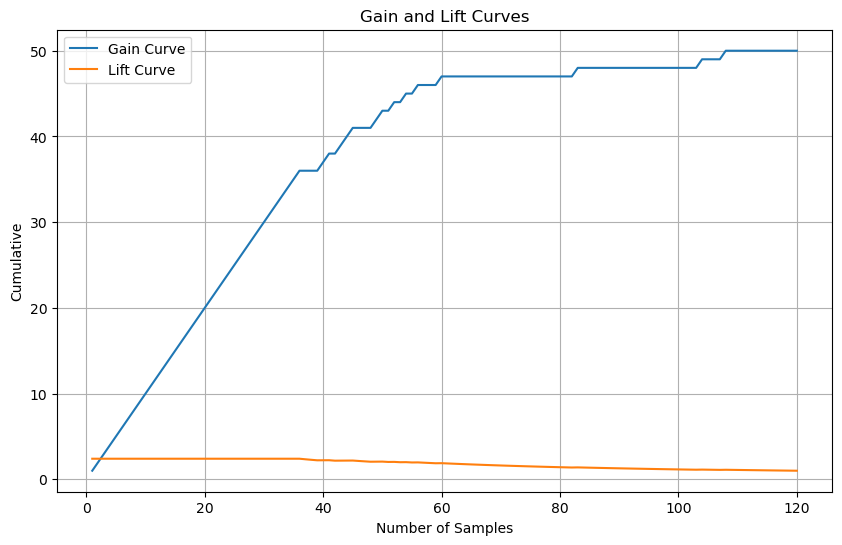

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc

# Step 1: Calculate Predicted Probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Step 2: Sort Predictions
sorted_indices = np.argsort(y_prob)[::-1]
y_true_sorted = y_test.iloc[sorted_indices]
y_prob_sorted = y_prob[sorted_indices]

# Step 3: Calculate Cumulative Gains
cumulative_positive = np.cumsum(y_true_sorted)
cumulative_total = np.arange(1, len(y_true_sorted) + 1)

# Step 4: Calculate Cumulative Lift
expected_positives = np.sum(y_true_sorted) / len(y_true_sorted)
cumulative_lift = cumulative_positive / (expected_positives * cumulative_total)

# Step 5: Plot the Curves
plt.figure(figsize=(10, 6))

# Gain Curve
plt.plot(cumulative_total, cumulative_positive, label='Gain Curve')

# Lift Curve
plt.plot(cumulative_total, cumulative_lift, label='Lift Curve')

plt.xlabel('Response Variables')
plt.ylabel('Cumulative')
plt.title('Gain and Lift Curves')
plt.legend()
plt.grid(True)
plt.show()


In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(y_true, y_pred):
    """
    Function to plot the confusion matrix.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

def plot_gains_lift(y_true, y_score, bins=10):
    """
    Function to plot the gains and lift curves.
    """
    df = pd.DataFrame({'y_true': y_true, 'y_score': y_score})
    df['bucket'] = pd.qcut(df['y_score'], bins, labels=False)
    grouped = df.groupby('bucket', as_index=False)
    agg_data = grouped.agg({'y_true': ['count', 'sum']})
    agg_data.columns = ['bucket', 'total_count', 'actual_count']
    agg_data.sort_values(by='bucket', ascending=True, inplace=True)
    agg_data['cumulative_count'] = agg_data['total_count'].cumsum()
    agg_data['cumulative_actual_count'] = agg_data['actual_count'].cumsum()
    agg_data['percent_total'] = agg_data['cumulative_count'] / agg_data['cumulative_count'].max()
    agg_data['percent_actual'] = agg_data['cumulative_actual_count'] / agg_data['actual_count'].sum()
    agg_data['lift'] = agg_data['percent_actual'] / agg_data['percent_total']
    agg_data['cumulative_lift'] = agg_data['lift'].cumsum()

    # Plot gains curve
    plt.figure(figsize=(10, 5))
    plt.plot(agg_data['percent_total'], agg_data['percent_actual'], label='Gains Curve', color='blue')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.title('Gains Curve')
    plt.xlabel('Cumulative % of Population')
    plt.ylabel('Cumulative % of Actual')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot lift curve
    plt.figure(figsize=(10, 5))
    plt.plot(agg_data['percent_total'], agg_data['lift'], label='Lift Curve', color='green')
    plt.title('Lift Curve')
    plt.xlabel('Cumulative % of Population')
    plt.ylabel('Lift')
    plt.legend()
    plt.grid(True)
    plt.show()

# Use the functions to plot the confusion matrix and gains/lift curves
plot_confusion_matrix(y_test, y_pred)
plot_gains_lift(y_test, y_score)


NameError: name 'sns' is not defined

<Figure size 600x400 with 0 Axes>

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(y_true, y_pred):
    """
    Function to plot the confusion matrix.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


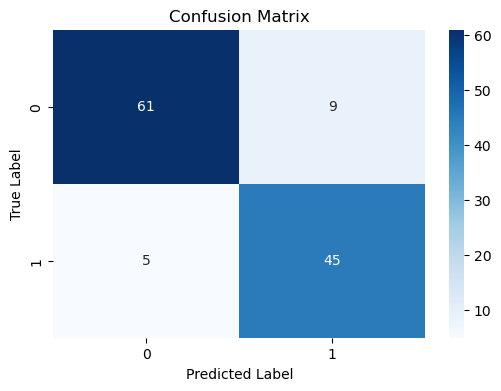

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns  # Make sure seaborn is imported

def plot_confusion_matrix(y_true, y_pred):
    """
    Function to plot the confusion matrix.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Now you can call the function with your true and predicted labels
plot_confusion_matrix(y_test, y_pred)


In [61]:
# Determine which cluster represents value customers and which represents non-value customers
value_cluster = 0  # Assuming cluster 0 represents value customers, adjust as needed

# Create a new binary variable to indicate value customers
data['Value_Customer'] = 0  # Initialize with 0
data.loc[data['Cluster'] == value_cluster, 'Value_Customer'] = 1  # Assign 1 to value customers

# Display the first few rows of the updated dataset
print(data.head())


KeyError: 'Cluster'

In [62]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv(r"C:\Users\nanaa\Downloads\BathSoapHousehold3.csv")

# Define relevant variables for each scenario
purchase_behavior_vars = ['No. of Brands', 'Brand Runs', 'Total Volume', 'No. of  Trans', 'Value', 
                          'Trans / Brand Runs', 'Vol/Tran', 'Avg. Price ']
basis_of_purchase_vars = ['Pur Vol No Promo - %', 'Pur Vol Promo 6 %', 'Pur Vol Other Promo %']
demographics_vars = ['SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'CHILD', 'CS', 'Affluence Index']
combined_vars = purchase_behavior_vars + basis_of_purchase_vars + demographics_vars

# Combine all variables
all_vars = combined_vars

# Standardize the variables
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[all_vars])

# Choose the number of clusters (k)
k = 2

# Perform k-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add clusters as a new column in the dataset
data['Cluster'] = clusters

# Group the dataset by clusters
grouped_data = data.groupby('Cluster')

# Create a list to store DataFrames for each group
grouped_dfs = []

# Iterate over the groups and create DataFrames, rounding decimals
for name, group in grouped_data:
    group_df = group.round(decimals=2)
    grouped_dfs.append(group_df)

# Display DataFrames for each group in a tabular form
for idx, df in enumerate(grouped_dfs):
    print(f"Cluster {idx}:")
    display(df)
    print('\n')

# Identify which cluster represents value customers and which represents non-value customers
value_cluster = 0  # Adjust as needed based on your analysis
non_value_cluster = 1  # Adjust as needed based on your analysis

# Assign labels to indicate value customers (1) and non-value customers (0)
data['Customer_Type'] = 0  # Initialize with non-value customers
data.loc[data['Cluster'] == value_cluster, 'Customer_Type'] = 1  # Assign value customers

# Display the first few rows of the updated dataset
print(data.head())


C:\Users\nanaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nanaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Cluster 0:


,Member id,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,...,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15,Cluster
3,1014030,4,0,0,0,4,0,0,5,0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.60,0.0,0
19,1025070,3,0,0,0,2,0,0,5,0,...,0.22,0.00,0.00,0.33,0.0,0.33,0.11,0.00,0.0,0
20,1025140,4,0,0,0,2,0,0,5,0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.94,0.0,0
23,1027160,3,0,0,0,3,0,0,5,0,...,0.00,0.00,0.06,0.00,0.0,0.00,0.00,0.75,0.0,0
24,1027210,4,0,0,0,3,0,0,5,0,...,0.08,0.32,0.07,0.00,0.0,0.00,0.00,0.53,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,1161390,1,0,0,0,4,0,0,5,0,...,0.00,0.00,0.00,0.00,0.0,0.00,1.00,0.00,0.0,0
554,1161750,2,0,0,0,4,0,0,5,0,...,0.00,0.02,0.00,0.00,0.0,0.00,0.00,0.28,0.0,0
555,1161780,1,0,0,0,4,0,0,5,0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.27,0.0,0
570,1163300,1,0,0,0,4,0,0,5,0,...,0.00,0.00,0.00,0.16,0.0,0.00,0.00,0.00,0.0,0




Cluster 1:


,Member id,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,...,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15,Cluster
0,1010010,4,3,10,1,4,4,2,4,1,...,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.13,0.34,1
1,1010020,3,2,10,2,2,4,4,2,1,...,0.03,0.02,0.01,0.00,0.06,0.00,0.00,0.08,0.00,1
2,1014020,2,3,10,2,4,5,6,4,1,...,0.03,0.01,0.01,0.00,0.00,0.02,0.00,0.56,0.00,1
4,1014190,4,1,10,2,3,4,4,3,1,...,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.14,0.00,1
5,1017020,4,3,10,2,3,4,5,2,1,...,0.00,0.01,0.07,0.00,0.00,0.00,0.00,0.07,0.27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1167090,2,3,10,2,4,5,5,4,1,...,0.00,0.00,0.00,0.02,0.90,0.00,0.00,0.00,0.00,1
596,1167230,3,3,10,2,3,5,4,4,1,...,0.07,0.15,0.00,0.04,0.00,0.00,0.09,0.00,0.05,1
597,1167340,3,3,17,2,4,4,9,4,1,...,0.00,0.03,0.00,0.04,0.00,0.00,0.00,0.18,0.00,1
598,1167350,2,1,4,2,4,5,2,4,2,...,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.14,0.00,1




   Member id  SEC  FEH  MT  SEX  AGE  EDU  HS  CHILD  CS  ...  PropCat 8  \
0    1010010    4    3  10    1    4    4   2      4   1  ...   0.000000   
1    1010020    3    2  10    2    2    4   4      2   1  ...   0.016100   
2    1014020    2    3  10    2    4    5   6      4   1  ...   0.010823   
3    1014030    4    0   0    0    4    0   0      5   0  ...   0.000000   
4    1014190    4    1  10    2    3    4   4      3   1  ...   0.048193   

   PropCat 9  PropCat 10  PropCat 11  PropCat 12  PropCat 13  PropCat 14  \
0   0.000000         0.0    0.000000    0.028037         0.0    0.130841   
1   0.014311         0.0    0.059034    0.000000         0.0    0.080501   
2   0.008658         0.0    0.000000    0.016234         0.0    0.561688   
3   0.000000         0.0    0.000000    0.000000         0.0    0.600000   
4   0.000000         0.0    0.000000    0.000000         0.0    0.144578   

   PropCat 15  Cluster  Customer_Type  
0    0.339564        1              0  
1   

In [63]:
# Identify which cluster represents value customers and which represents non-value customers
value_cluster = 0  # Adjust as needed based on your analysis
non_value_cluster = 1  # Adjust as needed based on your analysis

# Assign labels to indicate value customers (1) and non-value customers (0)
data['Customer_Type'] = 0  # Initialize with non-value customers
data.loc[data['Cluster'] == value_cluster, 'Customer_Type'] = 1  # Assign value customers

# Display the first few rows of the updated dataset
print(data.head())


   Member id  SEC  FEH  MT  SEX  AGE  EDU  HS  CHILD  CS  ...  PropCat 8  \
0    1010010    4    3  10    1    4    4   2      4   1  ...   0.000000   
1    1010020    3    2  10    2    2    4   4      2   1  ...   0.016100   
2    1014020    2    3  10    2    4    5   6      4   1  ...   0.010823   
3    1014030    4    0   0    0    4    0   0      5   0  ...   0.000000   
4    1014190    4    1  10    2    3    4   4      3   1  ...   0.048193   

   PropCat 9  PropCat 10  PropCat 11  PropCat 12  PropCat 13  PropCat 14  \
0   0.000000         0.0    0.000000    0.028037         0.0    0.130841   
1   0.014311         0.0    0.059034    0.000000         0.0    0.080501   
2   0.008658         0.0    0.000000    0.016234         0.0    0.561688   
3   0.000000         0.0    0.000000    0.000000         0.0    0.600000   
4   0.000000         0.0    0.000000    0.000000         0.0    0.144578   

   PropCat 15  Cluster  Customer_Type  
0    0.339564        1              0  
1    0

In [64]:
# Determine which cluster represents value customers and which represents non-value customers
value_cluster = 0  # Assuming cluster 0 represents value customers, adjust as needed

# Create a new binary variable to indicate value customers
data['Value_Customer'] = 0  # Initialize with 0
data.loc[data['Cluster'] == value_cluster, 'Value_Customer'] = 1  # Assign 1 to value customers

# Display the first few rows of the updated dataset
print(data.head())


   Member id  SEC  FEH  MT  SEX  AGE  EDU  HS  CHILD  CS  ...  PropCat 9  \
0    1010010    4    3  10    1    4    4   2      4   1  ...   0.000000   
1    1010020    3    2  10    2    2    4   4      2   1  ...   0.014311   
2    1014020    2    3  10    2    4    5   6      4   1  ...   0.008658   
3    1014030    4    0   0    0    4    0   0      5   0  ...   0.000000   
4    1014190    4    1  10    2    3    4   4      3   1  ...   0.000000   

   PropCat 10  PropCat 11  PropCat 12  PropCat 13  PropCat 14  PropCat 15  \
0         0.0    0.000000    0.028037         0.0    0.130841    0.339564   
1         0.0    0.059034    0.000000         0.0    0.080501    0.000000   
2         0.0    0.000000    0.016234         0.0    0.561688    0.003247   
3         0.0    0.000000    0.000000         0.0    0.600000    0.000000   
4         0.0    0.000000    0.000000         0.0    0.144578    0.000000   

   Cluster  Customer_Type  Value_Customer  
0        1              0           

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Define the features (X) and the target variable (y)
features = ['Value_Customer']
target = 'Value_Customer'  # Assuming 'Customer_Type' is the target variable

# Split the data into features (X) and target variable (y)
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 1.0
Confusion Matrix:
 [[108   0]
 [  0  12]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        12

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



C:\Users\nanaa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\nanaa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


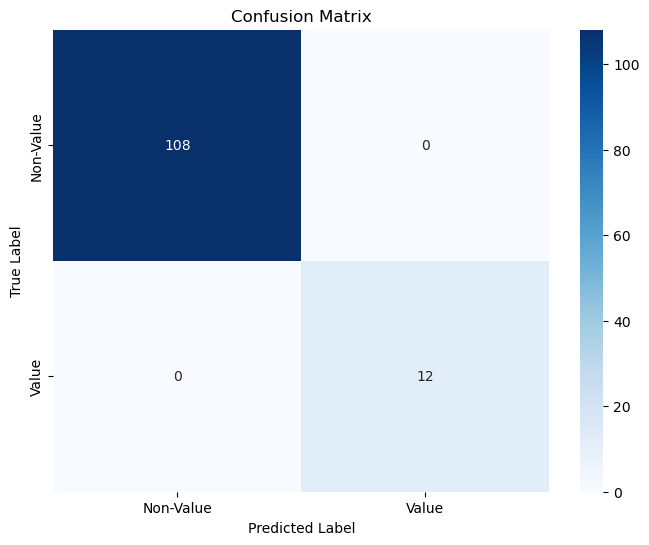

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        12

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Define the features (X) and the target variable (y)
features = ['No. of Brands', 'Brand Runs', 'Total Volume', 'No. of  Trans', 'Value', 
            'Trans / Brand Runs', 'Vol/Tran', 'Avg. Price ', 'Pur Vol No Promo - %', 
            'Pur Vol Promo 6 %', 'Pur Vol Other Promo %', 'SEC', 'FEH', 'MT', 'SEX', 
            'AGE', 'EDU', 'HS', 'CHILD', 'CS', 'Affluence Index']
target = 'Customer_Type'  # Assuming 'Customer_Type' is the target variable

# Split the data into features (X) and target variable (y)
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Plot the confusion matrix using Seaborn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Value', 'Value'], yticklabels=['Non-Value', 'Value'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)


In [69]:
def features_imp(model, cf) : 

    coefficients  = pd.DataFrame(model.feature_importances_)
    column_data     = pd.DataFrame(list(data))
    coef_sumry    = (pd.merge(coefficients,column_data,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    coef_sumry = coef_sumry[coef_sumry["coefficients"] !=0]
    trace = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Viridis",
                                  line = dict(width = .6,color = "black")))
    layout = dict(title =  'Feature Importances xgb_cfl')
                    
    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)